In this notebook:
1. Create a neural network using 30 epochs of training where the activation function is steepened by epoch + 1 until the final one in which it is set to binary decision
2. Create a copy of this network and prune weights around a specific region which is doubled until there is a certain dropoff in accuracy (1% by default). Retrain for one epoch with binary activation function
3. Repeat several times

In [1]:
import numpy as np
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)


import networksteep


net = networksteep.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9029 / 10000
Epoch 1 : 9183 / 10000
Epoch 2 : 9212 / 10000
Epoch 3 : 9154 / 10000
Epoch 4 : 9257 / 10000
Epoch 5 : 9272 / 10000
Epoch 6 : 9290 / 10000


/home/jovyan/work/networksteep.py:218: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(- z * step))


Epoch 7 : 9224 / 10000
Epoch 8 : 9259 / 10000
Epoch 9 : 9264 / 10000
Epoch 10 : 9324 / 10000
Epoch 11 : 9182 / 10000
Epoch 12 : 9085 / 10000
Epoch 13 : 9235 / 10000
Epoch 14 : 9277 / 10000
Epoch 15 : 9341 / 10000
Epoch 16 : 9290 / 10000
Epoch 17 : 9310 / 10000
Epoch 18 : 9372 / 10000
Epoch 19 : 9287 / 10000
Epoch 20 : 9162 / 10000
Epoch 21 : 9330 / 10000
Epoch 22 : 9217 / 10000
Epoch 23 : 9301 / 10000
Epoch 24 : 9333 / 10000
Epoch 25 : 9372 / 10000
Epoch 26 : 9357 / 10000
Epoch 27 : 9259 / 10000
Epoch 28 : 9279 / 10000
Epoch 29 : 8879 / 10000


In [2]:
import network
net2 = network.Network([784,30,10], st=30)
net2.weights = net.weights
net2.biases = net.biases

In [3]:
import prune
net2 = prune.prune_retrain(net2, 0.005)

0.8879  without prune
0.9377  around region ± 0.005
0.9374  around region ± 0.01
0.9377  around region ± 0.02
0.9379  around region ± 0.04
0.9384  around region ± 0.08
0.9373  around region ± 0.16
Epoch 0 complete
Epoch 1 complete
Epoch with pruned weights around 0.16: 8944 / 10000
sparsity:  1520  / 23820 =  6.381192275398824 %


In [4]:
#add something in prune about slowing down the rate of increase of region?
oldnet = net2
for i in range(5):
    newnet = network.Network([784,30,10], st=30)
    newnet.weights = oldnet.weights
    newnet.biases = oldnet.biases
    print("Prune round ", i)
    newnet = prune.prune_retrain(newnet, 0.005, threshold=0.05)
    oldnet = newnet

Prune round  0
0.8944  without prune
0.9386  around region ± 0.005
0.9384  around region ± 0.01
0.9381  around region ± 0.02
0.9382  around region ± 0.04
0.9384  around region ± 0.08
0.9402  around region ± 0.16
0.9391  around region ± 0.32
0.7724  around region ± 0.64
Epoch 0 complete
Epoch 1 complete
Epoch with pruned weights around 0.64: 8904 / 10000
sparsity:  5951  / 23820 =  24.98320738874895 %
Prune round  1
0.8904  without prune
0.9426  around region ± 0.005
0.9426  around region ± 0.01
0.9426  around region ± 0.02
0.9427  around region ± 0.04
0.9426  around region ± 0.08
0.9418  around region ± 0.16
0.9247  around region ± 0.32
0.3438  around region ± 0.64
Epoch 0 complete
Epoch 1 complete
Epoch with pruned weights around 0.64: 9027 / 10000
sparsity:  6245  / 23820 =  26.21746431570109 %
Prune round  2
0.9027  without prune
0.9401  around region ± 0.005
0.9401  around region ± 0.01
0.9401  around region ± 0.02
0.9399  around region ± 0.04
0.94  around region ± 0.08
0.9395  aro

In [8]:
import matplotlib.pyplot as plt

In [10]:
len(net4.weights[0])

30

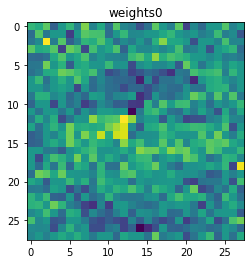

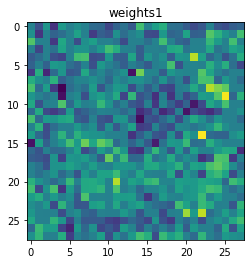

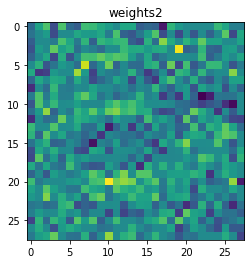

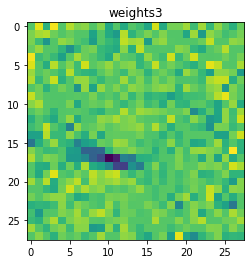

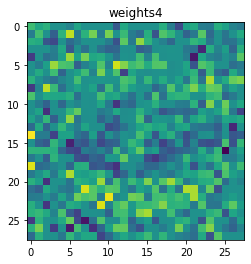

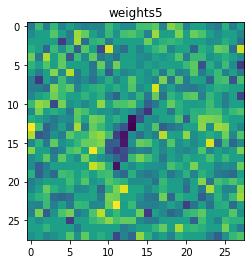

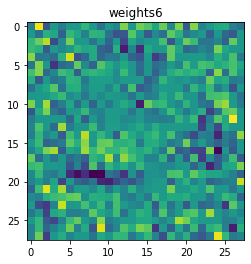

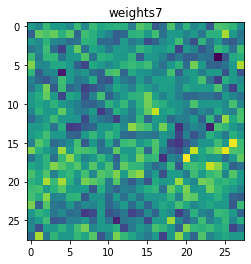

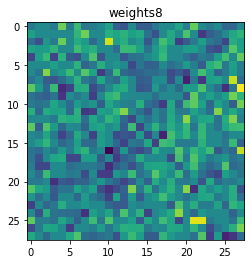

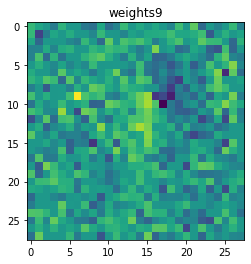

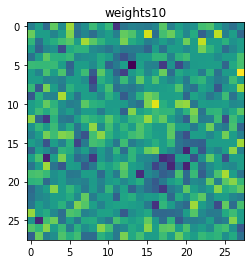

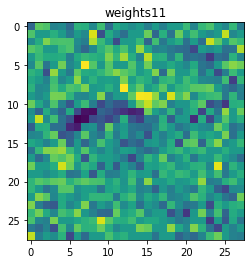

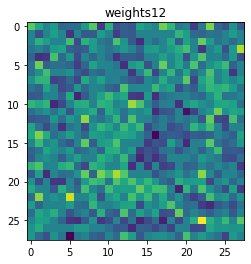

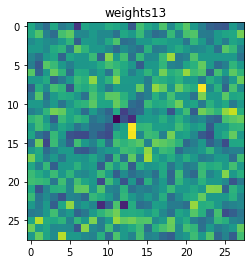

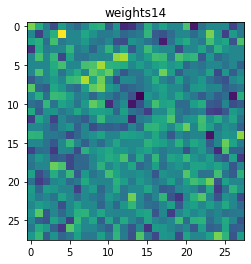

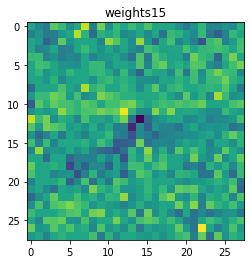

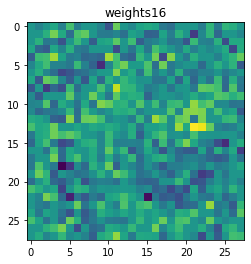

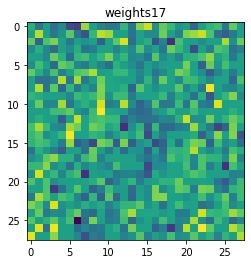

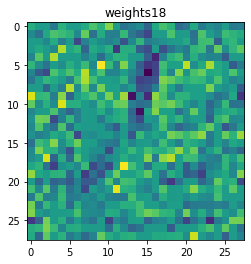

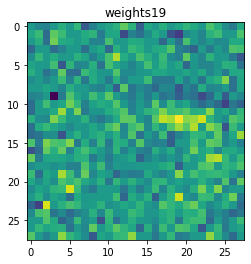

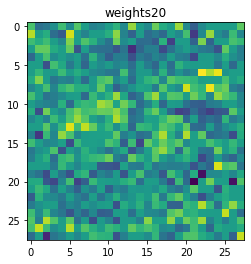

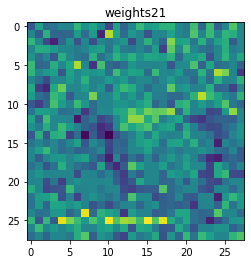

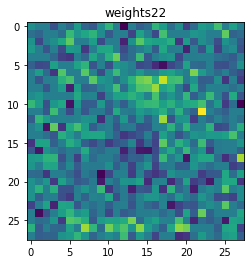

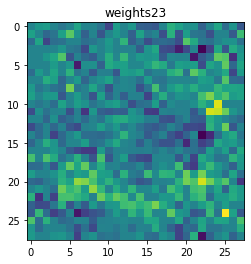

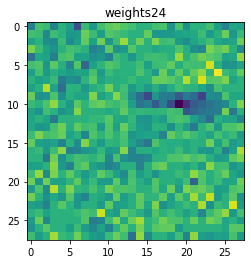

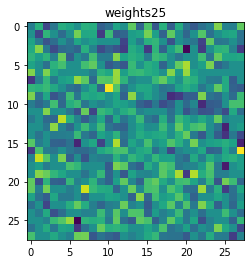

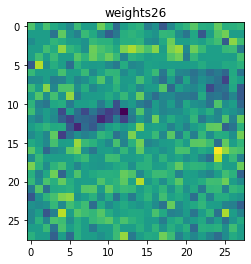

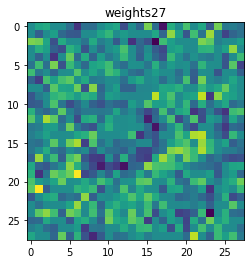

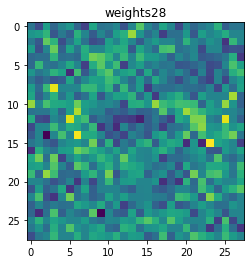

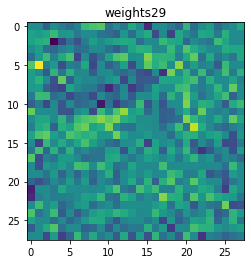

<Figure size 432x288 with 0 Axes>

In [12]:
for i in range(30):
    img = net4.weights[0][i].reshape(28,28)
    plt.imshow(img, interpolation='nearest')
   
    s = 'weights' + str(i) 
    plt.title(s)
    plt.show()
    plt.savefig(s + '.png')

    #!!!start with trained network first, then prune harsly and then hard limit
    
    #prune in first training session (without hardlimiter)
    #retrain with hard limiter
    
    #prune more viciously?
    
    #rather than deleting small weights, move small ones closer to zero and bigger ones move a little bit
    
    #maybe remove 'odd' standalone high weights

In [ ]:
#back off on the steepness while pruning?
# 